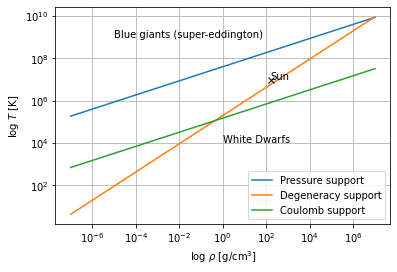

In [47]:
import numpy as np
from astropy.constants import sigma_sb, k_B, c, m_p, m_e, h, eps0, e
from astropy.units import g, cm, quantity_input, Quantity
import matplotlib.pyplot as plt


def calculate_pressure_support_temperature(rho, mu=1/2):
    numerator = 3*c*rho*k_B
    denominator = 4*mu*m_p*sigma_sb
    return ((numerator/denominator)**(1/3)).to("K")


def calculate_fermi_temperature(rho, mu=1):
    frac = 1/(3*np.pi*m_e*k_B)
    frac2 = 3/8*h**3*rho*np.pi**0.5/m_p
    return (frac * frac2**(2/3)).to("K")


def calculate_coulomb_temp(rho, mu=1):
    frac = 2*e.si**2/(12*np.pi*eps0*k_B)
    frac2 = 4*np.pi*rho/(3*mu*m_p)
    return (frac*frac2**(1/3)).to("K")


densities = np.linspace(10**-7, 10**7, 100) * g/cm**3
fig, ax = plt.subplots()
ax.plot(densities, calculate_pressure_support_temperature(densities), label="Pressure support")
ax.plot(densities, calculate_fermi_temperature(densities), label="Degeneracy support")
ax.plot(densities, calculate_coulomb_temp(densities), label="Coulomb support")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"log $\rho$ [g/cm$^3$]")
ax.set_ylabel("log $T$ [K]")
ax.grid(True)
ax.plot(160, 10**7, "kx")
ax.annotate("Sun", (160, 10**7))
ax.annotate("Blue giants (super-eddington)", (10**(-5), 10**9))
ax.annotate("White Dwarfs", (1, 10**4))
ax.legend(loc="lower right")

In [59]:
# Exercise 4:
from astropy.constants import u, c, M_sun
eta = 0.1
M_fused = eta/3*M_sun
m_He = 4.0026032*u
m_C = 12* u
E_single = (3*m_He- m_C)*c**2
E_tot = E_single * M_fused/(3*m_He)
print(E_tot.to("J"))
print(E_single.to("J"))

3.874280483651844e+42 J
1.1655188281317452e-12 J
